# Convolutional Neural Networks (CNNs)

## Quelle der Daten

https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database?resource=download (zuletzt aufgerufen 01/2024)
    
M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, M. T. Islam, “Can AI help in screening Viral and COVID-19 pneumonia?” IEEE Access, Vol. 8, 2020, pp. 132665 - 132676.

Rahman, T., Khandakar, A., Qiblawey, Y., Tahir, A., Kiranyaz, S., Kashem, S.B.A., Islam, M.T., Maadeed, S.A., Zughaier, S.M., Khan, M.S. and Chowdhury, M.E., 2020. Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-ray Images.

## Installation der Bibliotheken

In [1]:
import os

import cv2

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Einlesen und Präprozessierung der Daten

In [2]:
main_path = "C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\COVID-19_Radiography_Dataset"

covid_dir = os.path.join(main_path, "covid_images")
normal_dir = os.path.join(main_path, "normal_images")

print("Anzahl Bilder mit COVID:", len(os.listdir(covid_dir)))
print("Anzahl normaler Bilder:", len(os.listdir(normal_dir)))

Anzahl Bilder mit COVID: 3616
Anzahl normaler Bilder: 10192


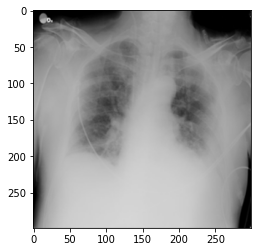

In [3]:
example_image = cv2.imread(os.path.join(covid_dir, "COVID-1.png"))

plt.imshow(example_image)

In [4]:
example_image.shape

(299, 299, 3)

In [5]:
def loadImages(dir, size, label):
  images = []
  labels = []
    
  for i in range(len(size)):
    img_path = dir + "/" + size[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(label)
  
  images = np.asarray(images)
    
  return images, labels

In [6]:
covid_images, covid_labels = loadImages(covid_dir, os.listdir(covid_dir), 1)

len(covid_images), len(covid_labels)

(3616, 3616)

In [7]:
normal_images, normal_labels = loadImages(normal_dir, os.listdir(normal_dir), 0)

len(normal_images), len(normal_labels)

(10192, 10192)

## Aufteilung der Daten

In [8]:
x = np.r_[covid_images, normal_images]

y = np.r_[covid_labels, normal_labels]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

## CNN-Architektur

In [10]:
print(x_test[0].shape)

(100, 100, 3)


In [11]:
model = Sequential()

model.add(Conv2D(32, 3, input_shape = (100, 100, 3), activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, activation = "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

## Modelltraining und -evaluation

In [12]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = "accuracy")

In [13]:
model.fit(x_train, y_train, 
          batch_size = 32, epochs = 5, 
          validation_data = (x_test, y_test))

Epoch 1/5
367/367 [==============================] - 80s 210ms/step - loss: 0.3658 - accuracy: 0.8277 - val_loss: 0.3021 - val_accuracy: 0.8740
Epoch 2/5
367/367 [==============================] - 88s 240ms/step - loss: 0.2295 - accuracy: 0.9046 - val_loss: 0.2523 - val_accuracy: 0.9035
Epoch 3/5
367/367 [==============================] - 88s 241ms/step - loss: 0.1781 - accuracy: 0.9253 - val_loss: 0.2081 - val_accuracy: 0.9141
Epoch 4/5
367/367 [==============================] - 92s 251ms/step - loss: 0.1448 - accuracy: 0.9412 - val_loss: 0.1903 - val_accuracy: 0.9199
Epoch 5/5
367/367 [==============================] - 92s 250ms/step - loss: 0.1183 - accuracy: 0.9538 - val_loss: 0.1812 - val_accuracy: 0.9315


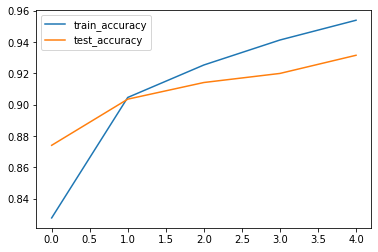

In [14]:
plt.plot(model.history.history["accuracy"], label = "train_accuracy")
plt.plot(model.history.history["val_accuracy"], label = "test_accuracy")
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(x_test)

y_pred_bin = (y_pred > 0.5).astype(int)

Label: 0
Modell-Ausgabe: [0]


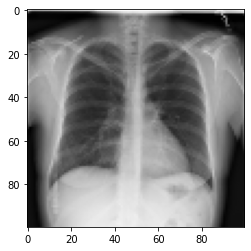

In [16]:
print("Label:", y_test[0])

print("Modell-Ausgabe:", y_pred_bin[0])

plt.imshow(x_test[0])